In [1]:
import Customers
import matplotlib.pyplot as plt
import numpy as np

# Testing class Customer()

## Customer.setThresholdLinear()

### Testing that it matches histogram of true p.m.f.

To test this function we will generate $10^4$ samples using the `customer.setThresholdLinear()` function and generate a histogram. This should match with the true probability mass function, which will be a linearly decreasing function.

In [2]:
#set the minimum and maximum price for our test
#these are also the defaults of the `setThresholdLinear()` function
min_price = 0
max_price = 100

In [3]:
#Generate 10000 RVs from Customer.setThresholdLinear()
thresholds_hist = []
cumlative = [0]*(max_price + 1 - min_price)
for i in range(10000):
    customer = Customers.Customer()
    customer.setThresholdLinear(min_price,max_price)
    
    #this will be used for the histogram
    thresholds_hist.append(customer.getThreshold())

    #this will be used later
    cumlative[int(customer.getThreshold())] +=1



In [4]:
#create the true probability mass function
x = range(min_price,max_price+1)
y = [i/sum(x) for i in x.__reversed__()]

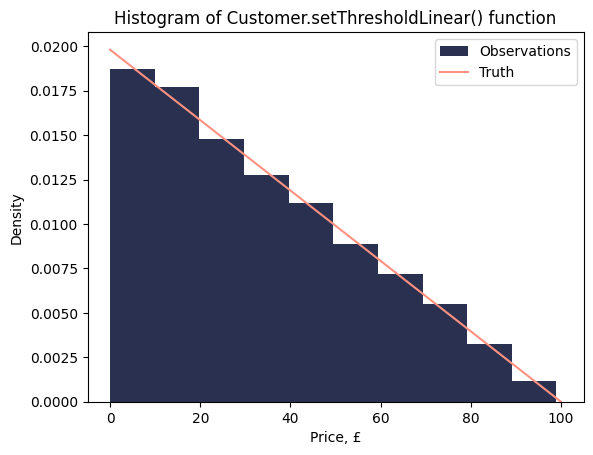

In [5]:
#Create histogram of RV observation
plt.hist(thresholds_hist,density = True,color = (42/255,49/255,80/255),label='Observations')
#overlay with true pmf the observations came from
plt.plot(y,label = 'Truth',color=(255/255,145/255,129/255))
plt.ylabel("Density")
plt.xlabel("Price, £")
plt.title("Histogram of Customer.setThresholdLinear() function")
plt.legend()
plt.show()

### Looking at expected revenue

In [6]:
#normalise our cumlative list to create a sampled cdf
sampled_cumlative = [count/sum(cumlative) for count in cumlative]

#set up vector for sampled survival function
sampled_survival = []
sampled_expectation = []
for price in range(min_price,max_price+1):
    sampled_survival.append(sum(sampled_cumlative[price:max_price+1]))
    sampled_expectation.append(sampled_survival[price]*price)

#using the true pmf we then create a true survival funtion and expectation
true_survival = [sum(y[price:max_price+1]) for price in range(min_price,max_price+1)]
true_expectation = [true_survival[price]*price for price in range(min_price,max_price+1)]


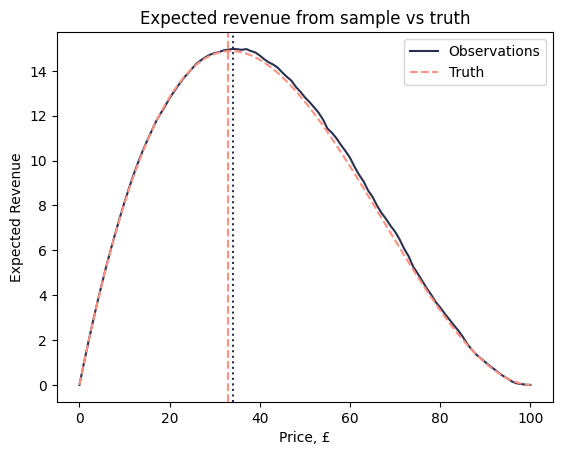

In [7]:
plt.plot(sampled_expectation,color = (42/255,49/255,80/255),label='Observations')
plt.plot(true_expectation,'--',label = 'Truth',color=(255/255,145/255,129/255))
plt.axvline(np.argmax(sampled_expectation),linestyle=':',color = (42/255,49/255,80/255))
plt.axvline(np.argmax(true_expectation),linestyle='--',color=(255/255,145/255,129/255))
plt.title('Expected revenue from sample vs truth')
plt.ylabel('Expected Revenue')
plt.xlabel('Price, £')
plt.legend()
plt.show()

## Sorting products thresholds in .SetThresholdLinear()

In the case where we care about more that one product we need to make sure our functions are working as expected. In the following test, we show that when generating multiple product thresholds the sorting works as it should.

The reasoning behind the sorting is that we assume customers are willing to pay more for the more premium products.

In [8]:
#seed to be used
n_seed =11

#initialise customer
cust = Customers.Customer()

#set seed and generate 3 thresholds that are sorted
np.random.seed(n_seed)
cust.setThresholdLinear(n_products=3,sort=True)
print("Sorted:",cust.getThreshold())

#set the same seed and generate the 3 same thresholds and see if they are sorted or not
np.random.seed(n_seed)
cust.setThresholdLinear(n_products=3,sort=False)
print("Unsorted:",cust.getThreshold())

Sorted: [26.0, 9.0, 0.0]
Unsorted: [9.0, 0.0, 26.0]


## Customer.setLeadTimeUniform()

### Testing that it matches true p.m.f.

To test this function we will generate $10^4$ samples using the `customer.setLeadTimeUniform()` function and generate a plot of sampled observations. This should match with the true probability mass function, which will be a discrete uniform distribution.

In [9]:
#set the minimum and maximum lead times for our test
#these are also the defaults of the `setLeadTimeUniform()` function
min_lead = 1
max_lead = 7

In [10]:
#Generate 10000 RVs from Customer.setLeadTimeUniform()
lead_time_count = [0]+[0]*(max_lead+1-min_lead)
for i in range(10000):
    customer = Customers.Customer()
    customer.setLeadTimeUniform(min_lead,max_lead)
    
    #this will be used for the verification plot
    lead_time_count[customer.getLeadTime()] += 1

normalised_lead_time = [count/sum(lead_time_count) for count in lead_time_count]

#create the true probability mass function
unif_prob = [0]+[1/(max_lead+1-min_lead)]*(max_lead+1-min_lead)

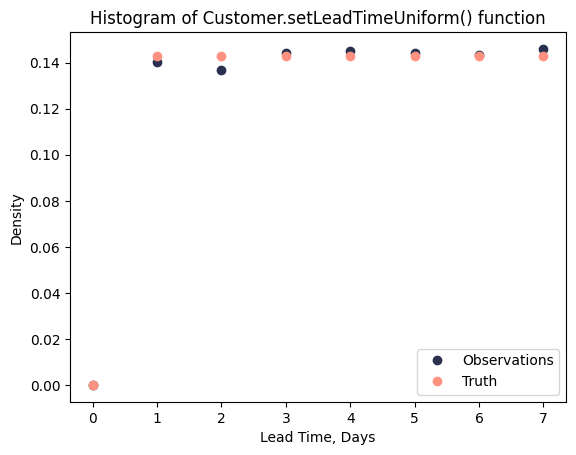

In [11]:
#Create histogram of RV observation
plt.plot(normalised_lead_time,'o',color = (42/255,49/255,80/255),label = 'Observations')
#overlay with true pmf the observations came from
plt.plot(unif_prob,'o',label = 'Truth',color=(255/255,145/255,129/255))
plt.ylabel("Density")
plt.xlabel("Lead Time, Days")
plt.title("Histogram of Customer.setLeadTimeUniform() function")
plt.legend()
plt.show()

## Customer.setLoSUniform()

### Testing that it matches true p.m.f.

To test this function we will generate $10^4$ samples using the `customer.setLoSUniform()` function and generate a plot of sampled observations. This should match with the true probability mass function, which will be a discrete uniform distribution.

In [12]:
#set the minimum and maximum length of stays for our test
#these are also the defaults of the `setLoSUniform()` function
min_LoS = 1
max_LoS = 2

In [13]:
#Generate 10000 RVs from Customer.setLeadTimeUniform()
LoS_count = [0]+[0]*(max_LoS+1-min_LoS)
for i in range(10000):
    customer = Customers.Customer()
    customer.setLoSUniform(min_LoS,max_LoS)
    
    #this will be used for the verification plot
    LoS_count[customer.getLoS()] += 1

normalised_LoS = [count/sum(LoS_count) for count in LoS_count]

#create the true probability mass function
unif_prob_LoS = [0]+[1/(max_LoS+1-min_LoS)]*(max_LoS+1-min_LoS)

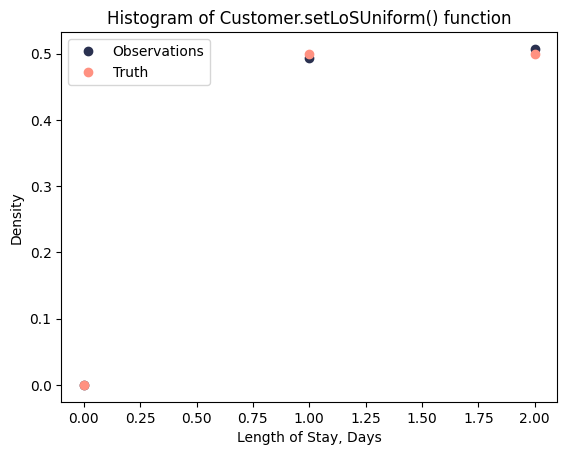

In [14]:
#Create histogram of RV observation
plt.plot(normalised_LoS,'o',color = (42/255,49/255,80/255),label = 'Observations')
#overlay with true pmf the observations came from
plt.plot(unif_prob_LoS,'o',label = 'Truth',color=(255/255,145/255,129/255))
plt.ylabel("Density")
plt.xlabel("Length of Stay, Days")
plt.title("Histogram of Customer.setLoSUniform() function")
plt.legend()
plt.show()

## Customer.setSegmentUniform()
## Customer.setBuyTypeUniform()

In [15]:
#Generate 10000 segments and buy types
N = 10000
segment_count = {"business": 0, "leisure": 0, "switch": 0}
buy_type_count = {"min_buy": 0, "max_buy": 0, "rank_buy": 0, "utility": 0}
for i in range(N):
    customer = Customers.Customer()
    customer.setSegmentUniform()
    customer.setBuyTypeUniform()
    
    #this will be used for the verification plot
    segment_count[customer.getSegment()] += 1
    buy_type_count[customer.getBuyType()] += 1

normalised_segment = [segment_count["business"]/N,
                       segment_count["leisure"]/N,
                        segment_count["switch"]/N]
normalised_buy_count = [buy_type_count["min_buy"]/N,
                        buy_type_count["max_buy"]/N,
                        buy_type_count["rank_buy"]/N,
                        buy_type_count["utility"]/N]

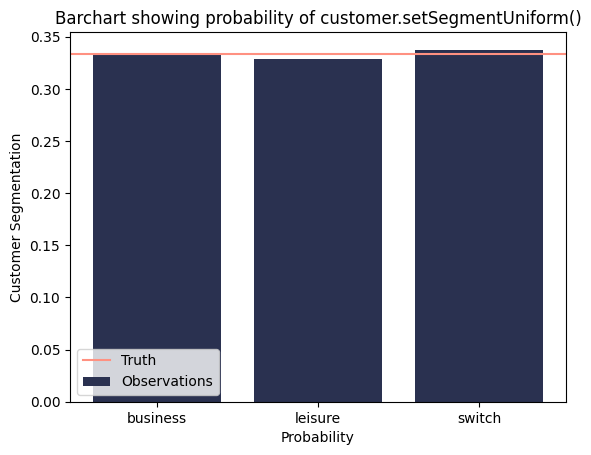

In [16]:
plt.bar(["business","leisure","switch"],normalised_segment,color = (42/255,49/255,80/255),label = 'Observations')
plt.axhline(1/3,label = 'Truth',color=(255/255,145/255,129/255))
plt.xlabel("Probability")
plt.ylabel("Customer Segmentation")
plt.title("Barchart showing probability of customer.setSegmentUniform()")
plt.legend()
plt.show()

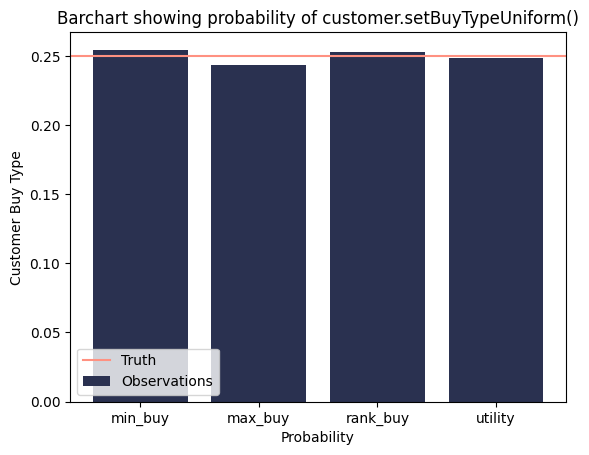

In [17]:
plt.bar(["min_buy","max_buy","rank_buy","utility"],normalised_buy_count,color = (42/255,49/255,80/255),label = 'Observations')
plt.axhline(1/4,label = 'Truth',color=(255/255,145/255,129/255))
plt.xlabel("Probability")
plt.ylabel("Customer Buy Type")
plt.title("Barchart showing probability of customer.setBuyTypeUniform()")
plt.legend()
plt.show()

## Customer.setPreferenceFromType()

In these next set of tests, we will set the custoemrs `buy_type` attribute and make sure that the ordered list of preferences that we get out is as expected.

In [19]:
#Let us offer prices
prices = [10,100,33]

#initilaise a customer
cust = Customers.Customer()

#Minimum buying
cust.setBuyTypeExact("min_buy")
cust.setPreferenceFromType(prices)
print('Minimum buying','Expect: [0,2,1]', 'Code gives', cust.getPreference())

#Maximum buying
cust.setBuyTypeExact("max_buy")
cust.setPreferenceFromType(prices)
print('Maximum buying','Expect: [1,2,0]', 'Code gives', cust.getPreference())

#Utility Maximisation
cust.setBuyTypeExact("utility")
#we also need customer thresholds for this one
#assume
cust.setThresholdExact([50,200,5])
cust.setPreferenceFromType(prices)
print('Utility Maximisation','Expect: [1,0,2]', 'Code gives', cust.getPreference())


Minimum buying Expect: [0,2,1] Code gives [0, 2, 1]
Maximum buying Expect: [1,2,0] Code gives [1, 2, 0]
Utility Maximisation Expect: [1,0,2] Code gives [1, 0, 2]


In [30]:
#Rank buying is slightly different
#as we assume each custoemr#'s rank is different

#Thus we compare it with the cust.setPreferenceRandom() method
#using seeds we should get the same ranked list

#as rank buying oredering doesnt depend on prices offer some length of 0s
n_products = 11
prices = [0]*n_products


#seed to be used
n_seed = 11

#initialise customer
cust = Customers.Customer()
cust.setBuyTypeExact("rank_buy")

print("Both lists should be the same:")

np.random.seed(n_seed)
cust.setPreferenceFromType(prices)
print(cust.getPreference())

np.random.seed(n_seed)
cust.setPreferenceRandom(n_products)
print(cust.getPreference())

Both lists should be the same:
[6, 10, 2, 3, 8, 4, 5, 7, 1, 0, 9]
[6, 10, 2, 3, 8, 4, 5, 7, 1, 0, 9]
